In [51]:
import gcm_filters
import numpy as np
import xarray as xr
import gcm_filters
import matplotlib.pyplot as plt
from xgcm import Grid

## Following gcm_filters examples 

https://gcm-filters.readthedocs.io/en/latest/examples/example_filter_types.html

In [3]:
from intake import open_catalog
cat = open_catalog('https://raw.githubusercontent.com/ocean-eddy-cpt/cpt-data/master/catalog.yaml')
list(cat)

['neverworld_five_day_averages',
 'neverworld_quarter_degree_snapshots',
 'neverworld_quarter_degree_averages',
 'neverworld_quarter_degree_static',
 'neverworld_quarter_degree_stats',
 'neverworld_eighth_degree_snapshots',
 'neverworld_eighth_degree_averages',
 'neverworld_eighth_degree_static',
 'neverworld_eighth_degree_stats',
 'neverworld_sixteenth_degree_snapshots',
 'neverworld_sixteenth_degree_averages',
 'neverworld_sixteenth_degree_static',
 'neverworld_sixteenth_degree_stats']

In [4]:
ds = cat['neverworld_quarter_degree_averages'].to_dask()
ds

/srv/conda/envs/notebook/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset>
Dimensions:     (time: 100, zl: 15, yh: 560, xq: 241, yq: 561, xh: 240, zi: 16,
                 nv: 2)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0084-05-03 12:00:00 ... 0085-09-18 12:00:00
  * xh          (xh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.38 59.62 59.88
  * xq          (xq) float64 0.0 0.25 0.5 0.75 1.0 ... 59.25 59.5 59.75 60.0
  * yh          (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * yq          (yq) float64 -70.0 -69.75 -69.5 -69.25 ... 69.25 69.5 69.75 70.0
  * zi          (zi) float64 1.022e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * zl          (zl) float64 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
Data variables: (12/33)
    CAu         (time, zl, yh, xq) float32 dask.array<chunksize=(10, 15, 560, 241), meta=np.ndarray>
    CAv         (time, zl, yq, xh) float32 dask.array<chunksize=(10, 15, 561, 240), meta=np.ndarray>
    KE          (time, zl, yh, xh) float32 dask.array<chunksize=(10, 15, 560, 240), meta=np.ndarray>
    KE_BT       (time, zl, yh, xh) float32 dask.array<chunksize=(10, 15, 560, 240), meta=np.ndarray>
    KE_CorAdv   (time, zl, yh, xh) float32 dask.array<chunksize=(10, 15, 560, 240), meta=np.ndarray>
    KE_adv      (time, zl, yh, xh) float32 dask.array<chunksize=(10, 15, 560, 240), meta=np.ndarray>
    ...          ...
    u           (time, zl, yh, xq) float32 dask.array<chunksize=(10, 15, 560, 241), meta=np.ndarray>
    u_BT_accel  (time, zl, yh, xq) float32 dask.array<chunksize=(10, 15, 560, 241), meta=np.ndarray>
    uh          (time, zl, yh, xq) float32 dask.array<chunksize=(10, 15, 560, 241), meta=np.ndarray>
    v           (time, zl, yq, xh) float32 dask.array<chunksize=(10, 15, 561, 240), meta=np.ndarray>
    v_BT_accel  (time, zl, yq, xh) float32 dask.array<chunksize=(10, 15, 561, 240), meta=np.ndarray>
    vh          (time, zl, yq, xh) float32 dask.array<chunksize=(10, 15, 561, 240), meta=np.ndarray>
Attributes:
    associated_files:  area_t: static.nc
    filename:          averages_00030002.nc
    grid_tile:         N/A
    grid_type:         regular
    title:             NeverWorld2

In [5]:
ds_static = cat['neverworld_quarter_degree_static'].to_dask()
ds_static

/srv/conda/envs/notebook/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset>
Dimensions:      (yq: 561, xq: 241, yh: 560, xh: 240, time: 1)
Coordinates:
  * time         (time) object 0001-01-01 00:00:00
  * xh           (xh) float64 0.125 0.375 0.625 0.875 ... 59.38 59.62 59.88
  * xq           (xq) float64 0.0 0.25 0.5 0.75 1.0 ... 59.25 59.5 59.75 60.0
  * yh           (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * yq           (yq) float64 -70.0 -69.75 -69.5 -69.25 ... 69.5 69.75 70.0
Data variables: (12/21)
    Coriolis     (yq, xq) float32 dask.array<chunksize=(561, 241), meta=np.ndarray>
    area_t       (yh, xh) float64 dask.array<chunksize=(560, 240), meta=np.ndarray>
    area_u       (yh, xq) float64 dask.array<chunksize=(560, 241), meta=np.ndarray>
    area_v       (yq, xh) float64 dask.array<chunksize=(561, 240), meta=np.ndarray>
    depth_ocean  (yh, xh) float32 dask.array<chunksize=(560, 240), meta=np.ndarray>
    dxCu         (yh, xq) float64 dask.array<chunksize=(560, 241), meta=np.ndarray>
    ...           ...
    geolon_u     (yh, xq) float32 dask.array<chunksize=(560, 241), meta=np.ndarray>
    geolon_v     (yq, xh) float32 dask.array<chunksize=(561, 240), meta=np.ndarray>
    wet          (yh, xh) float64 dask.array<chunksize=(560, 240), meta=np.ndarray>
    wet_c        (yq, xq) float32 dask.array<chunksize=(561, 241), meta=np.ndarray>
    wet_u        (yh, xq) float32 dask.array<chunksize=(560, 241), meta=np.ndarray>
    wet_v        (yq, xh) float32 dask.array<chunksize=(561, 240), meta=np.ndarray>
Attributes:
    filename:   static.nc
    grid_tile:  N/A
    grid_type:  regular
    title:      NeverWorld2

In [6]:
wet_mask = ds_static.wet
area = ds_static.area_t

In [7]:
filter_scale = 10
dx_min = 1

In [8]:
gcm_filters.required_grid_vars(gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED)

['area', 'wet_mask']

In [9]:
filter_simple_fixed_factor = gcm_filters.Filter(
                                    filter_scale=filter_scale,
                                    dx_min=dx_min,
                                    filter_shape=gcm_filters.FilterShape.GAUSSIAN,
                                    grid_type=gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED,
                                    grid_vars={'area': area, 'wet_mask': wet_mask}
                                )
filter_simple_fixed_factor

Filter(filter_scale=10, dx_min=1, filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=3.141592653589793, ndim=2, n_steps=11, grid_type=<GridType.REGULAR_WITH_LAND_AREA_WEIGHTED: 4>)

In [10]:
KE_filtered_simple_fixed_factor = filter_simple_fixed_factor.apply(ds.KE, dims=['yh', 'xh'])

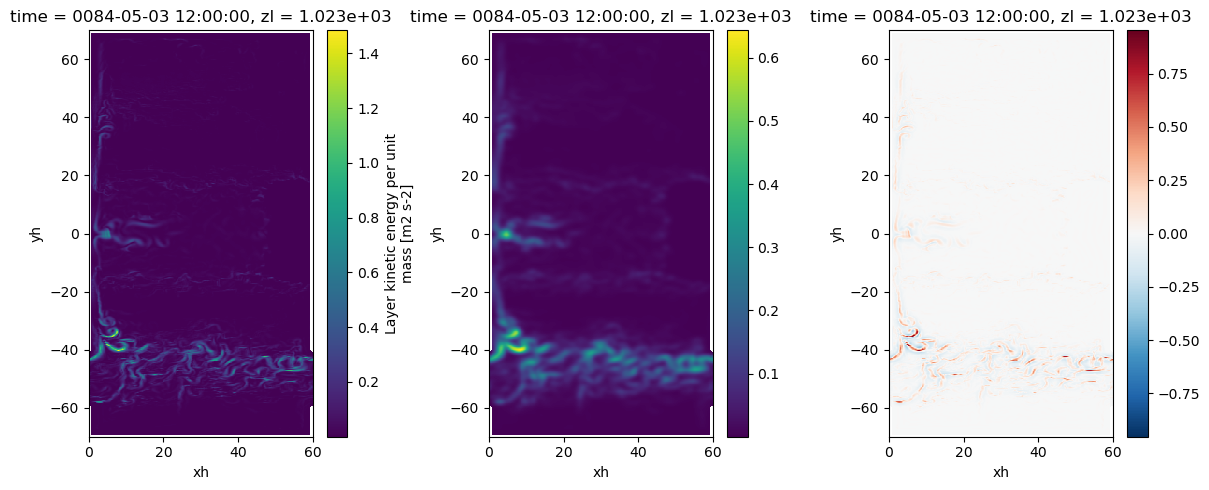

In [15]:
time = 0
layer = 0

plt.figure(figsize=(12, 5))

plt.subplot(131)
ds.KE.isel(time=time,zl=layer).plot() 

plt.subplot(132)
KE_filtered_simple_fixed_factor.isel(time=time,zl=layer).plot() 

plt.subplot(133)
(ds.KE - KE_filtered_simple_fixed_factor).isel(time=time,zl=layer).plot() 

plt.tight_layout()

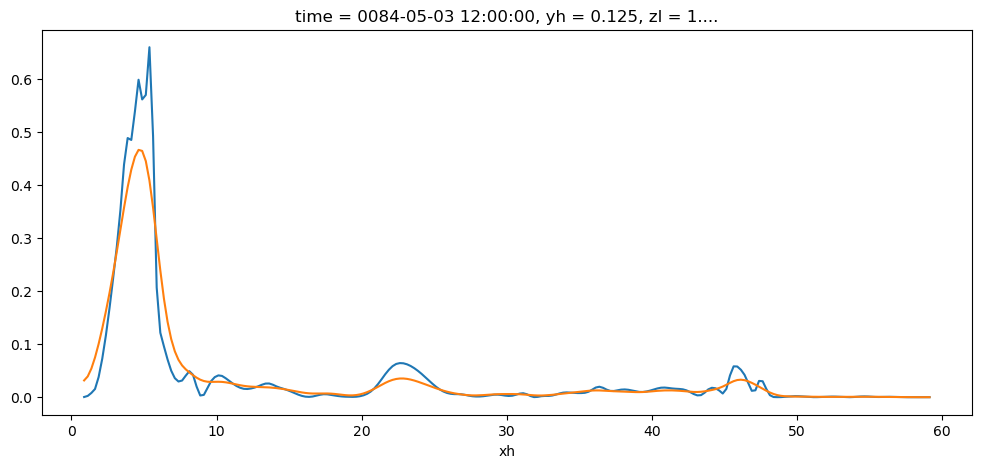

In [21]:
plt.figure(figsize=(12, 5))

ds.KE.isel(time=0, zl=0, yh=280).plot()
KE_filtered_simple_fixed_factor.isel(time=0, zl=0, yh=280).plot()

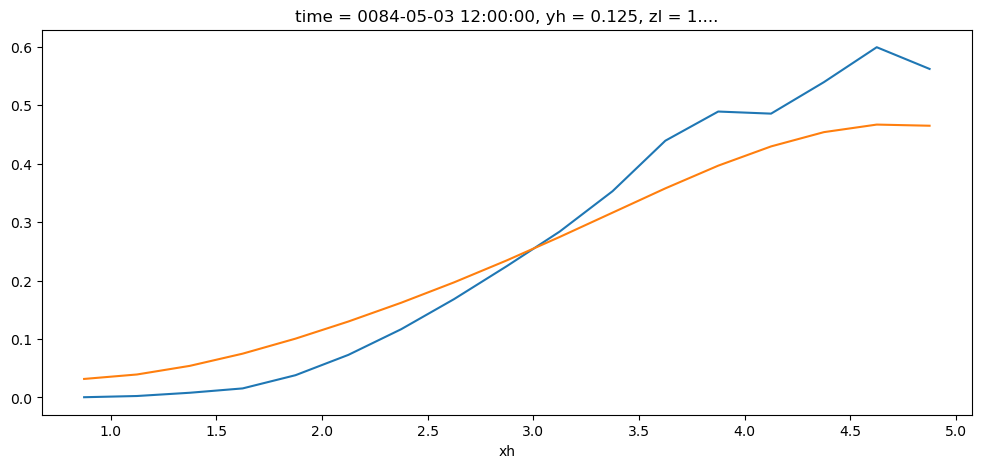

In [22]:
plt.figure(figsize=(12, 5))

ds.KE.isel(time=0, zl=0, yh=280).sel(xh=slice(0, 5)).plot()
KE_filtered_simple_fixed_factor.isel(time=0, zl=0, yh=280).sel(xh=slice(0, 5)).plot()

## Going further using Loose et al 2023 notebooks
https://github.com/NoraLoose/energy_cycles/blob/main/filter_data.ipynb

One of the important things to start worrying about are the masks. MOM6 inbuilt wetmask only considers topography that is felt at top interface. However, when we start filtering other layers we need to be concerned with regions where these layers outcrop and incrop. 

In [31]:
h = ds.h

In [32]:
h_cum = h.isel(zl=slice(None,None, -1)).cumsum('zl') # distance between top of layer (top interace) and bottom topo.

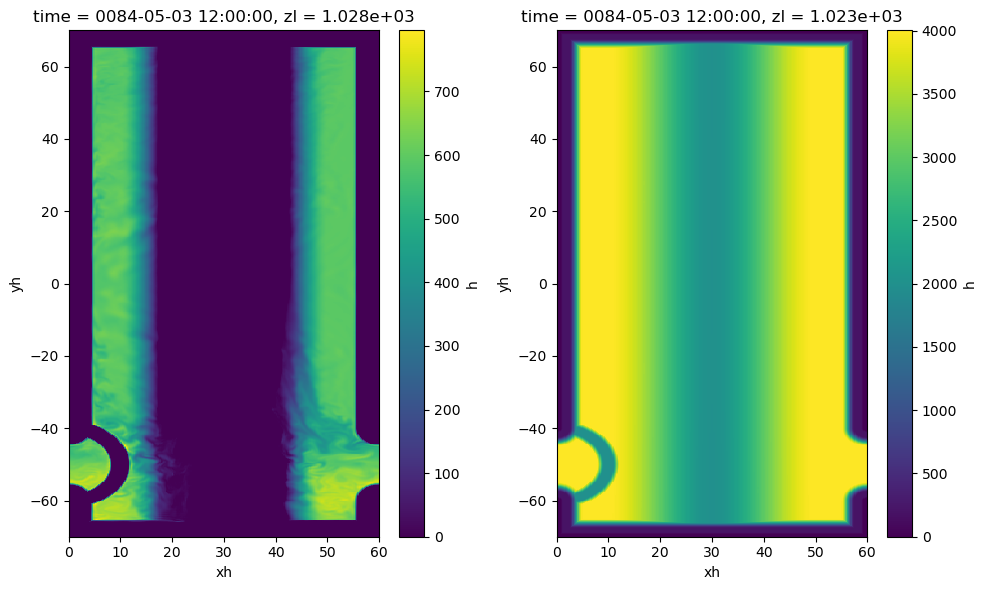

In [36]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
h_cum.isel(zl=0, time=0).plot()

plt.subplot(122)
h_cum.isel(zl=-1, time=0).plot()

plt.tight_layout()

In [35]:
h_cum_layer = h_cum.isel(zl=slice(None,None, -1))

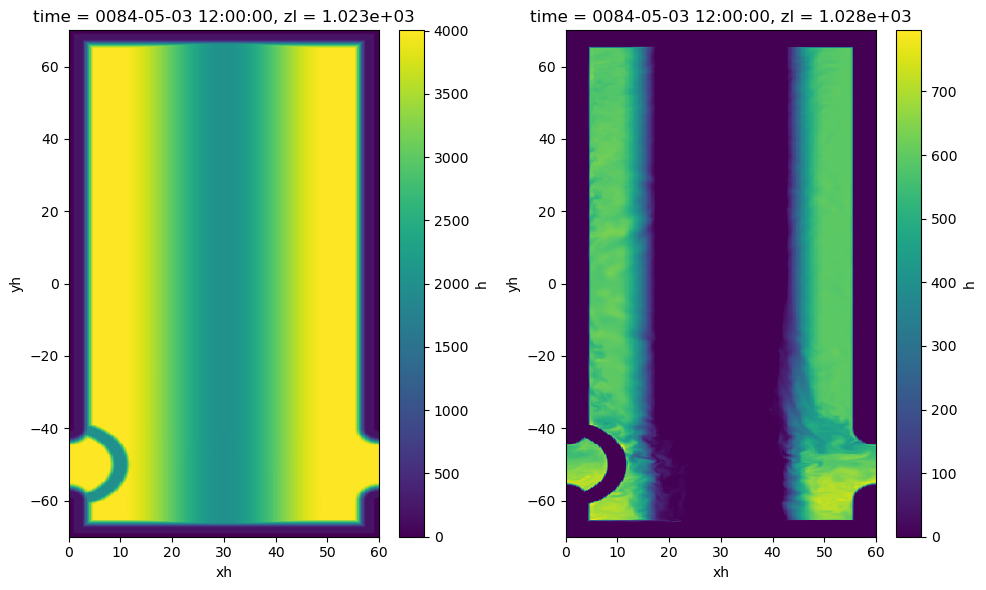

In [37]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
h_cum_layer.isel(zl=0, time=0).plot()

plt.subplot(122)
h_cum_layer.isel(zl=-1, time=0).plot()

plt.tight_layout()

In [39]:
h_cum_interface =  np.append(h_cum_layer.values, np.zeros((100, 1, 560, 240)), axis=1)

In [41]:
h_cum_interface = xr.DataArray(h_cum_interface, coords=ds.e2.coords, dims=ds.e2.dims)


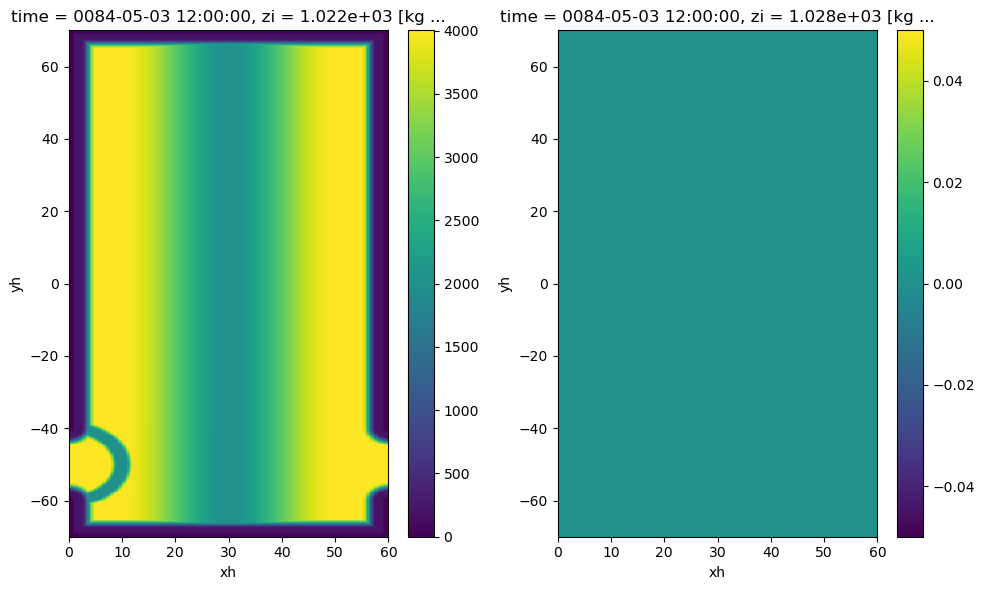

In [43]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
h_cum_interface.isel(zi=0, time=0).plot()

plt.subplot(122)
h_cum_interface.isel(zi=-1, time=0).plot()

plt.tight_layout()

In [44]:
h_cum_interface2 = ds.e2 - ds.e2.isel(zi=-1)


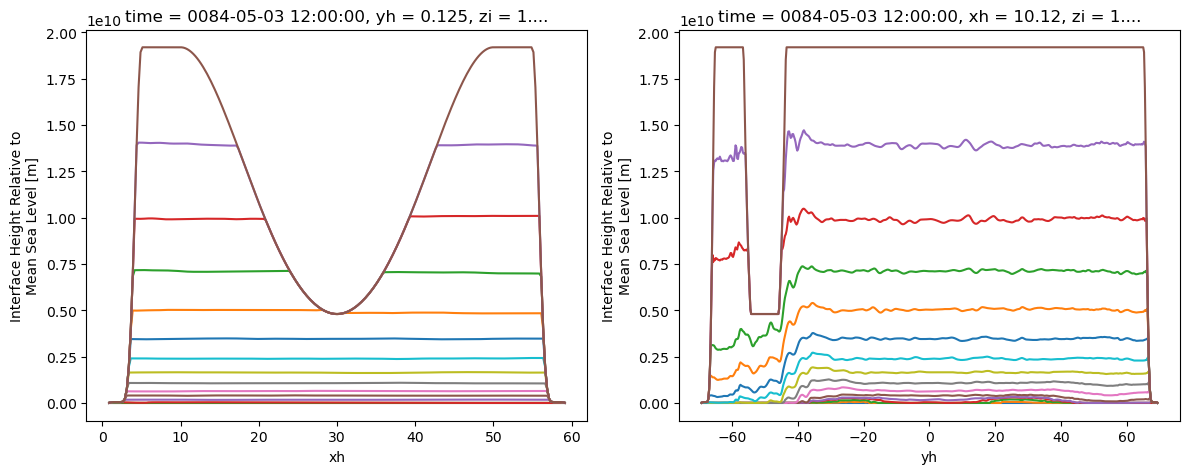

In [48]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
for i in range(0,16):
    ds.e2.isel(time=0, zi=i).sel(yh=0, method='nearest').plot()

plt.subplot(122)
for i in range(0,16):
    ds.e2.isel(time=0, zi=i).sel(xh=10, method='nearest').plot()

plt.tight_layout()

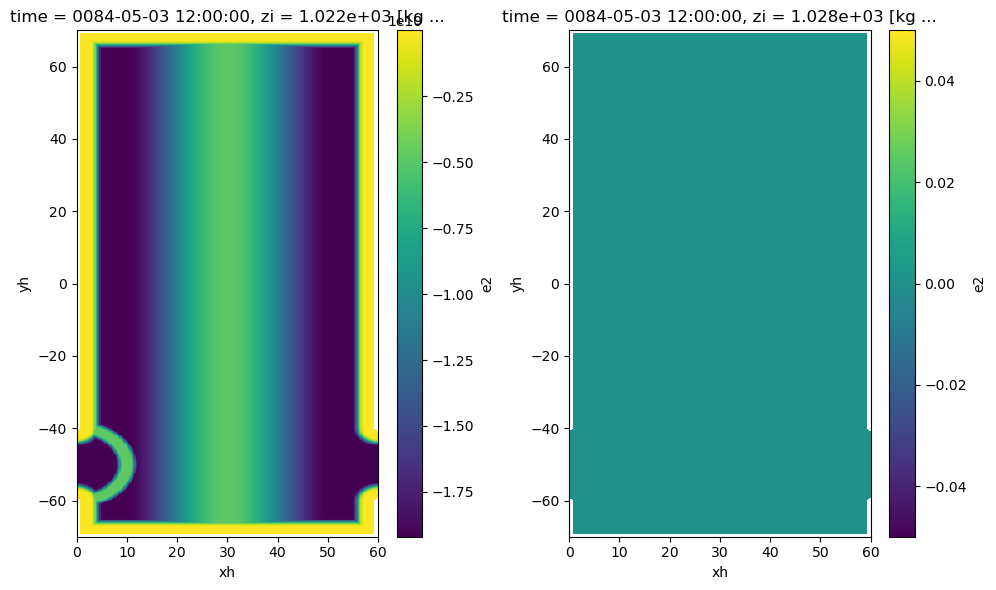

In [45]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
h_cum_interface2.isel(zi=0, time=0).plot()

plt.subplot(122)
h_cum_interface2.isel(zi=-1, time=0).plot()

plt.tight_layout()


In [50]:
mask = xr.where(h_cum_interface > 5, 1, 0) # mask for interfaces 


In [54]:
coords = {'X': {'center': 'xh', 'outer': 'xq'},
            'Y': {'center': 'yh', 'outer': 'yq'},
            'Z': {'center': 'zl', 'outer': 'zi'} }

grid = Grid(ds, coords=coords, periodic=['X'])

In [56]:

mask_interp = grid.interp(mask, 'Z')

/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [57]:
mask_bottom = xr.where(mask_interp < 1, 1, 0)  # this will set all layers with the values 0 or 0.5 to 1, and all ones to 0
ds['bottom_mask'] = mask_bottom
ds['bottom_mask'].attrs = {'units' : '', 'long_name': 'Bottom mask: = 1 if lower interface of layer is within BBL, = 0 otherwise'}

In [61]:
mask = ds.bottom_mask.isel(time=0)

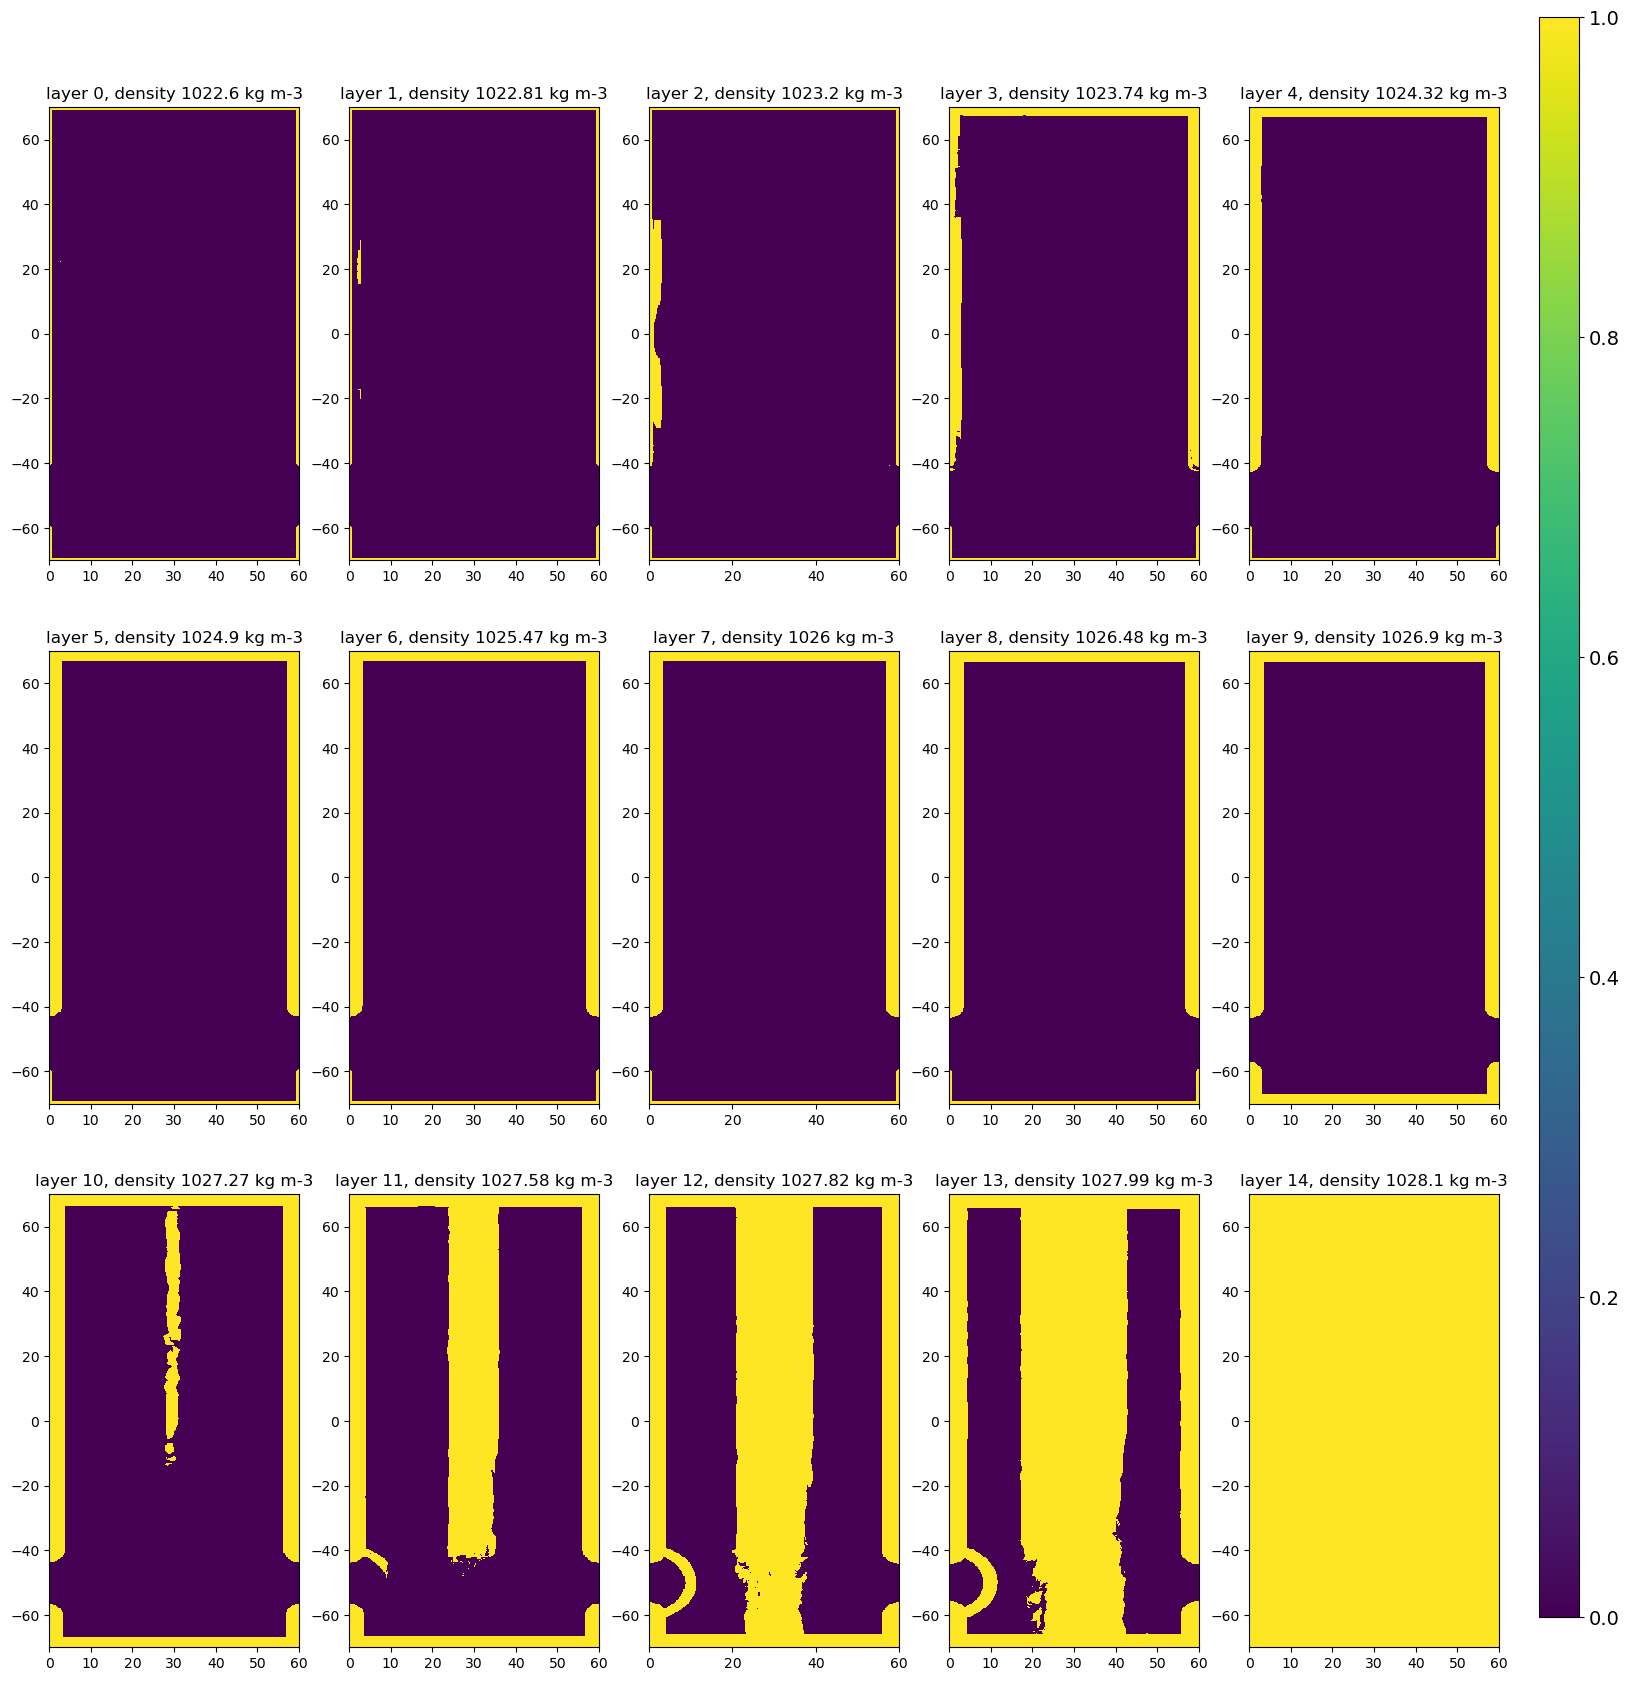

In [62]:
fig, axs = plt.subplots(3, 5, figsize=(20, 20))
for layer, ax in zip(range(15), axs.flatten()):
    p = mask.isel(zl=layer).plot(ax=ax, vmax=1, vmin=0, add_colorbar=False)
    ax.set(xlabel='', ylabel='', title ='layer %i, density %g kg m-3' %(layer, mask.zl[layer].values))

    # colorbar
fig.subplots_adjust(right=0.85)
cax = fig.add_axes([0.87, 0.125, 0.02, 0.8])
cb = fig.colorbar(p, cax=cax)
cb.ax.tick_params(labelsize=14)


In this approach the bottom layer is always masked out. 